<a href="https://colab.research.google.com/github/sof1a03/DSS_groupproject/blob/main/Code/Features/REGIONAL_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regional DataBase analysis Report

Performs an exploratory summary of regional indicators to show overall trends, variation, and correlations between car types, income, and demographic structure.
It reports core statistics, distribution shapes, and the most correlated features

In [1]:
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

In [7]:
output_dir = "stat_reports"
os.makedirs(output_dir, exist_ok=True)
A4_W, A4_H = 8.27, 11.69 #A4
df = pd.read_csv("REGIONAL.csv") #change for the directionary you have

In [12]:
print("DataFrame Infos:")
print("SHAPE:")
print(df.shape)
print("SAMPLE ROWS:")
print(df.head(3))

DataFrame Infos:
SHAPE:
(5701, 47)
SAMPLE ROWS:
   nbh_code  avg_household_size  avg_house_value_woz  urbanization  \
0  0363AF01                 1.6                832.0           1.0   
1  0363AF02                 1.6                588.0           1.0   
2  0363AF03                 1.6                755.0           1.0   

   std_avg_household_size  std_avg_house_value_woz  std_urbanization   pc4  \
0               -1.492831                 2.371147         -1.717239  1011   
1               -1.492831                 0.931354         -1.717239  1011   
2               -1.492831                 1.916786         -1.717239  1011   

   p_gasoline  p_diesel  ...  std_p_inhb_15_to_25_year  \
0     0.80485  0.114241  ...                  0.298618   
1     0.80485  0.114241  ...                  0.298618   
2     0.80485  0.114241  ...                  0.298618   

   std_p_inhb_25_to_45_year  std_p_inhb_45_to_65_year  \
0                  1.743462                 -0.673898   
1          

In [13]:
print("COLUMN TYPES:")
print(df.dtypes)

COLUMN TYPES:
nbh_code                          object
avg_household_size               float64
avg_house_value_woz              float64
urbanization                     float64
std_avg_household_size           float64
std_avg_house_value_woz          float64
std_urbanization                 float64
pc4                                int64
p_gasoline                       float64
p_diesel                         float64
p_electric                       float64
p_hybrid                         float64
avg_yearly_income_k              float64
p_car_weight_0_to_850            float64
p_car_weight_851_to_1150         float64
p_car_weight_1151_to_1500        float64
p_car_weight_1501_more           float64
body_hatchback                   float64
body_station                     float64
body_mpv                         float64
std_p_gasoline                   float64
std_p_diesel                     float64
std_p_electric                   float64
std_p_hybrid                     float64
st

In [14]:
print("MISSING VALUES (top 10):")
print(df.isna().sum().sort_values(ascending=False).head(10))

print("UNIQUE VALUES (top 10):")
print(df.nunique().sort_values(ascending=False).head(10))

MISSING VALUES (top 10):
nbh_code                   0
avg_household_size         0
avg_house_value_woz        0
urbanization               0
std_avg_household_size     0
std_avg_house_value_woz    0
std_urbanization           0
pc4                        0
p_gasoline                 0
p_diesel                   0
dtype: int64
UNIQUE VALUES (top 10):
nbh_code        5701
p_large         4912
p_suv           4912
p_compact       4912
p_medium        4912
p_sports        4912
p_mpv           4912
pc4             1529
std_p_diesel    1502
p_diesel        1502
dtype: int64


Basic statystic summury

In [16]:
print("Basic summary of numeric columns:")
display(df.describe().T[['mean', 'std', 'min', 'max']].round(3))

Basic summary of numeric columns:


,mean,std,min,max
avg_household_size,2.217,0.414,1.000,3.900
avg_house_value_woz,437.485,181.152,31.000,2206.000
urbanization,3.057,1.536,1.000,5.000
std_avg_household_size,-0.100,0.934,-2.846,3.696
std_avg_house_value_woz,0.043,1.069,-2.355,10.479
std_urbanization,-0.329,1.037,-1.717,0.982
pc4,4822.121,2889.876,1011.000,9873.000
p_gasoline,0.829,0.047,0.000,0.940
p_diesel,0.119,0.043,0.000,0.529
p_electric,0.023,0.011,0.000,0.083


Top variation (features with highest std)

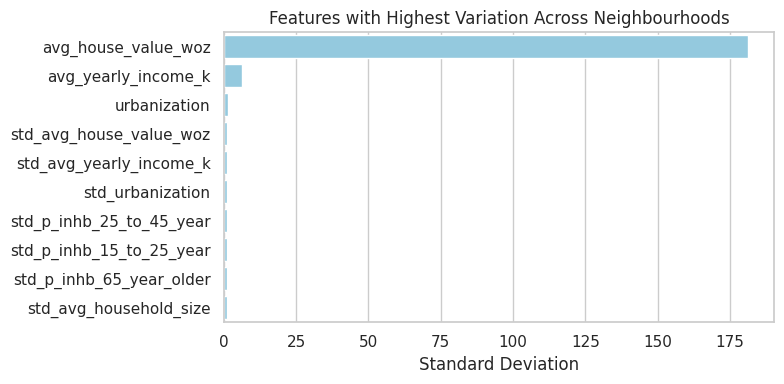

In [28]:
exclude_cols = ['pc4', 'inhabitants_total']
numeric_df = df.select_dtypes(include='number').drop(columns=[c for c in exclude_cols if c in df.columns])

top_var = numeric_df.std().sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_var.values, y=top_var.index, color="skyblue")
plt.title("Features with Highest Variation Across Neighbourhoods")
plt.xlabel("Standard Deviation")
plt.ylabel("")
plt.tight_layout()
plt.show()


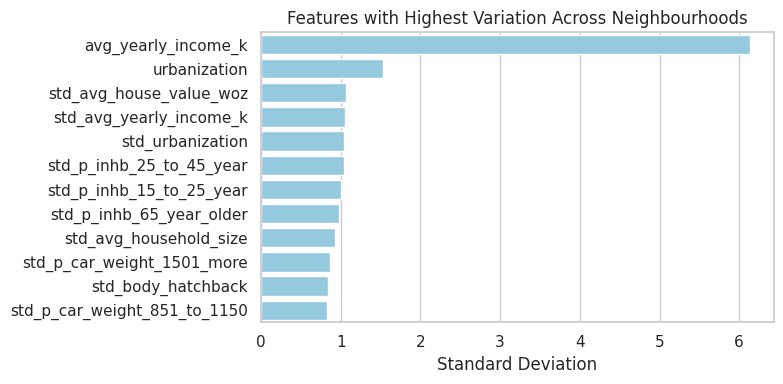

In [30]:
exclude_cols = ['pc4', 'inhabitants_total', 'avg_house_value_woz']
numeric_df = df.select_dtypes(include='number').drop(columns=[c for c in exclude_cols if c in df.columns])

top_var = numeric_df.std().sort_values(ascending=False).head(12)

plt.figure(figsize=(8, 4))
sns.barplot(x=top_var.values, y=top_var.index, color="skyblue")
plt.title("Features with Highest Variation Across Neighbourhoods")
plt.xlabel("Standard Deviation")
plt.ylabel("")
plt.tight_layout()
plt.show()

Correlation with income

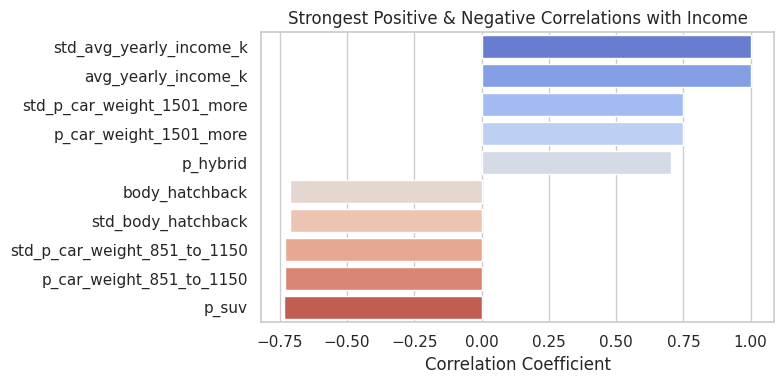

In [23]:
if "avg_yearly_income_k" in df.columns:
    corr_income = df.corr(numeric_only=True)["avg_yearly_income_k"].sort_values(ascending=False)
    top_corr = pd.concat([corr_income.head(5), corr_income.tail(5)])
    plt.figure(figsize=(8, 4))
    sns.barplot(x=top_corr.values, y=top_corr.index, hue=top_corr.index, palette="coolwarm", legend=False)
    plt.title("Strongest Positive & Negative Correlations with Income")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("")
    plt.tight_layout()
    plt.show()

Car type composition overview

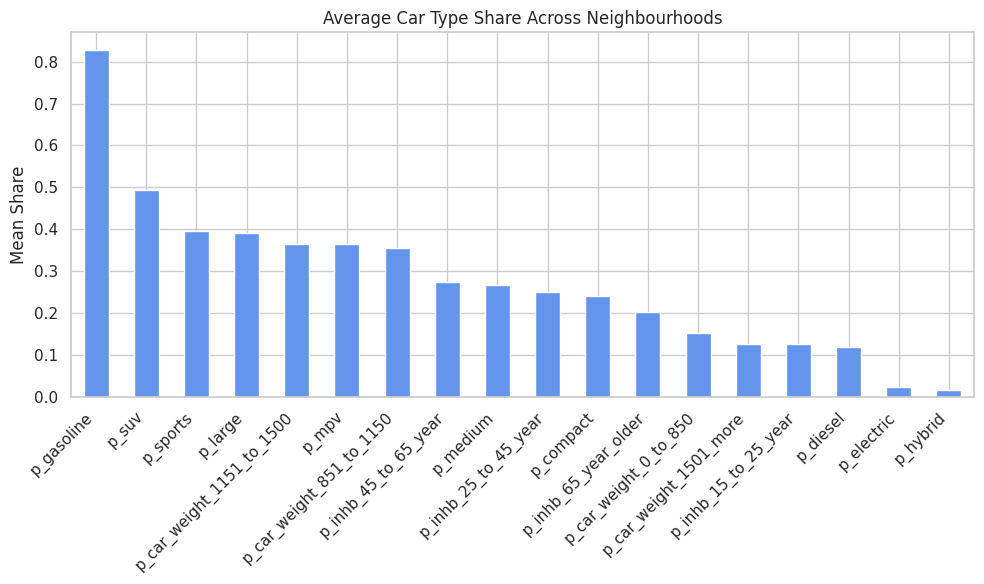

In [20]:
car_cols = [c for c in df.columns if c.startswith("p_") and not c.startswith("std_")]
plt.figure(figsize=(10, 6))
df[car_cols].mean().sort_values(ascending=False).plot(kind="bar", color="cornflowerblue")
plt.title("Average Car Type Share Across Neighbourhoods")
plt.ylabel("Mean Share")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Heatmap of main socio-economic & vehicle indicators

It is needed to provide threshold for what is relevant or not

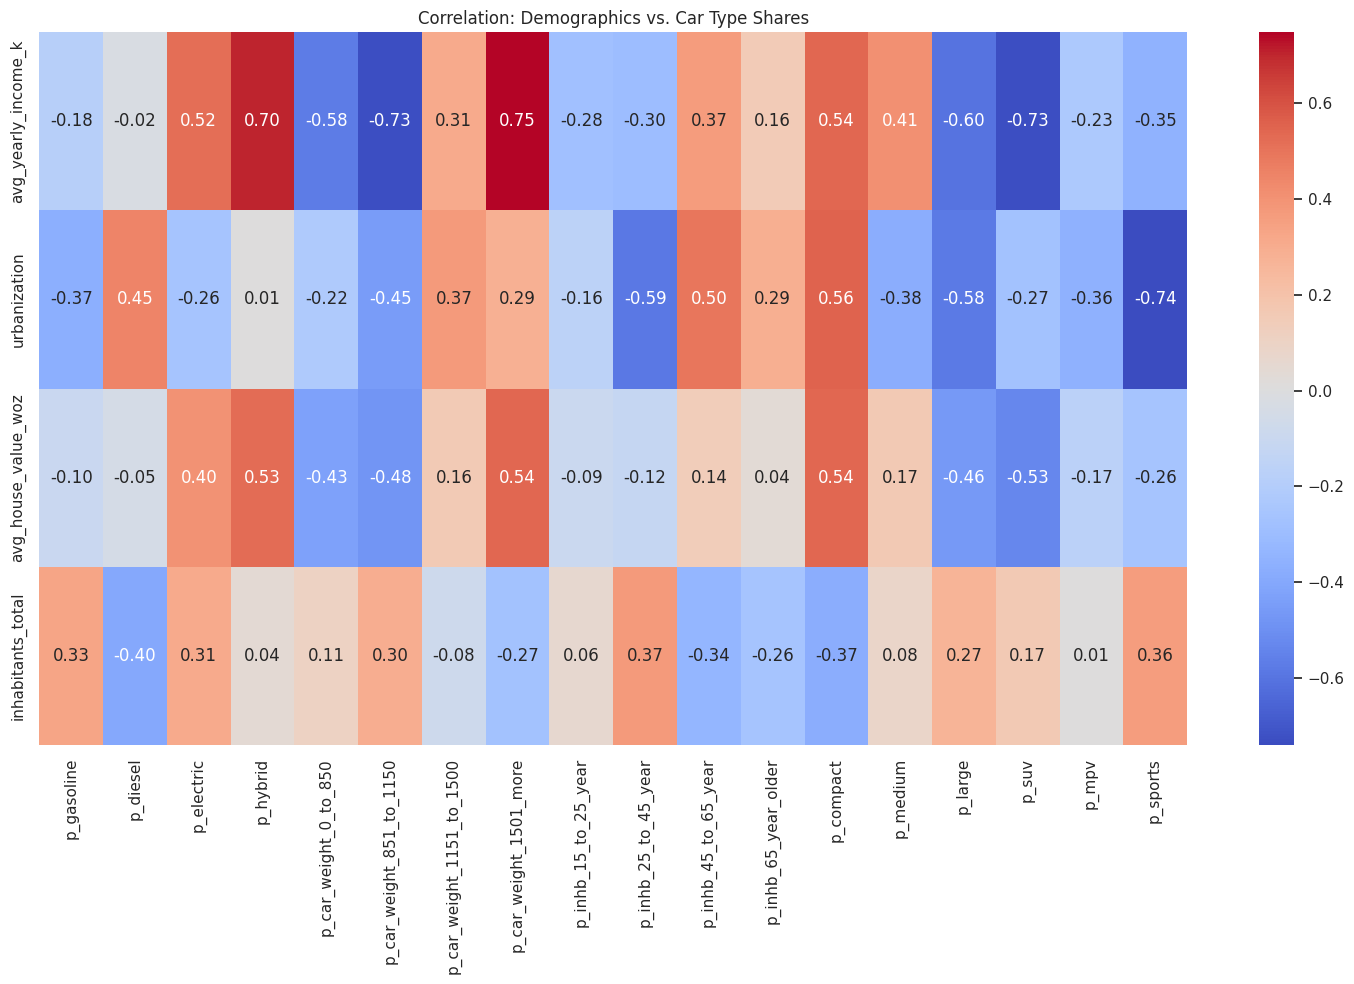

In [26]:
demo_cols = ["avg_yearly_income_k", "urbanization", "avg_house_value_woz", "inhabitants_total"]
car_cols = [c for c in df.columns if c.startswith("p_") and not c.startswith("std_")]
subset = demo_cols + car_cols
corr_matrix = df[subset].corr().loc[demo_cols, car_cols]

plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation: Demographics vs. Car Type Shares")
plt.tight_layout()
plt.show()

Columns to Plot:

In [4]:
cols_mapping = {
    "df": [
        "std_avg_yearly_income_k", "std_body_hatchback", "std_body_mpv", "std_body_station",
        "std_p_car_weight_0_to_850", "std_p_car_weight_1151-1500", "std_p_car_weight_1501_more",
        "std_p_car_weight_851_to_1150", "std_p_diesel", "std_p_electric",
        "std_p_gasoline", "std_p_hybrid", "std_avg_household_size", "std_urbanization",
        "std_avg_income_household", "std_p_inhb_15_to_25_year", "std_p_inhb_25_to_45_year",
        "std_p_inhb_45_to_65_year", "std_p_inhb_65_year_older"
    ]
}

In [9]:
def export_histograms(df_src, cols, df_name, out_dir=None):
    """Display 15 histograms per page using Seaborn styling (no file saving)."""
    cols_in_df = [c for c in cols if c in df_src.columns]
    if not cols_in_df:
        print(f"No valid columns to plot for {df_name}")
        return

    rows, cols_grid = 5, 3
    plots_per_page = rows * cols_grid
    n_pages = math.ceil(len(cols_in_df) / plots_per_page)

    for page in range(n_pages):
        fig, axes = plt.subplots(rows, cols_grid, figsize=(10, 14))
        axes = axes.flatten()
        fig.suptitle(f"Dataset: {df_name} (Page {page+1}/{n_pages})", fontsize=14, y=0.97)

        for i in range(plots_per_page):
            idx = page * plots_per_page + i
            ax = axes[i]

            if idx >= len(cols_in_df):
                ax.axis("off")
                continue

            col = cols_in_df[idx]
            data = df_src[col].dropna()

            try:
                sns.histplot(data, bins=20, kde=False, ax=ax, color='skyblue')
            except Exception:
                sns.countplot(x=data.astype(str), ax=ax, color='skyblue')
                ax.tick_params(axis='x', labelrotation=45)

            ax.set_title(col, fontsize=9)
            ax.set_xlabel("")
            ax.set_ylabel("")

        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

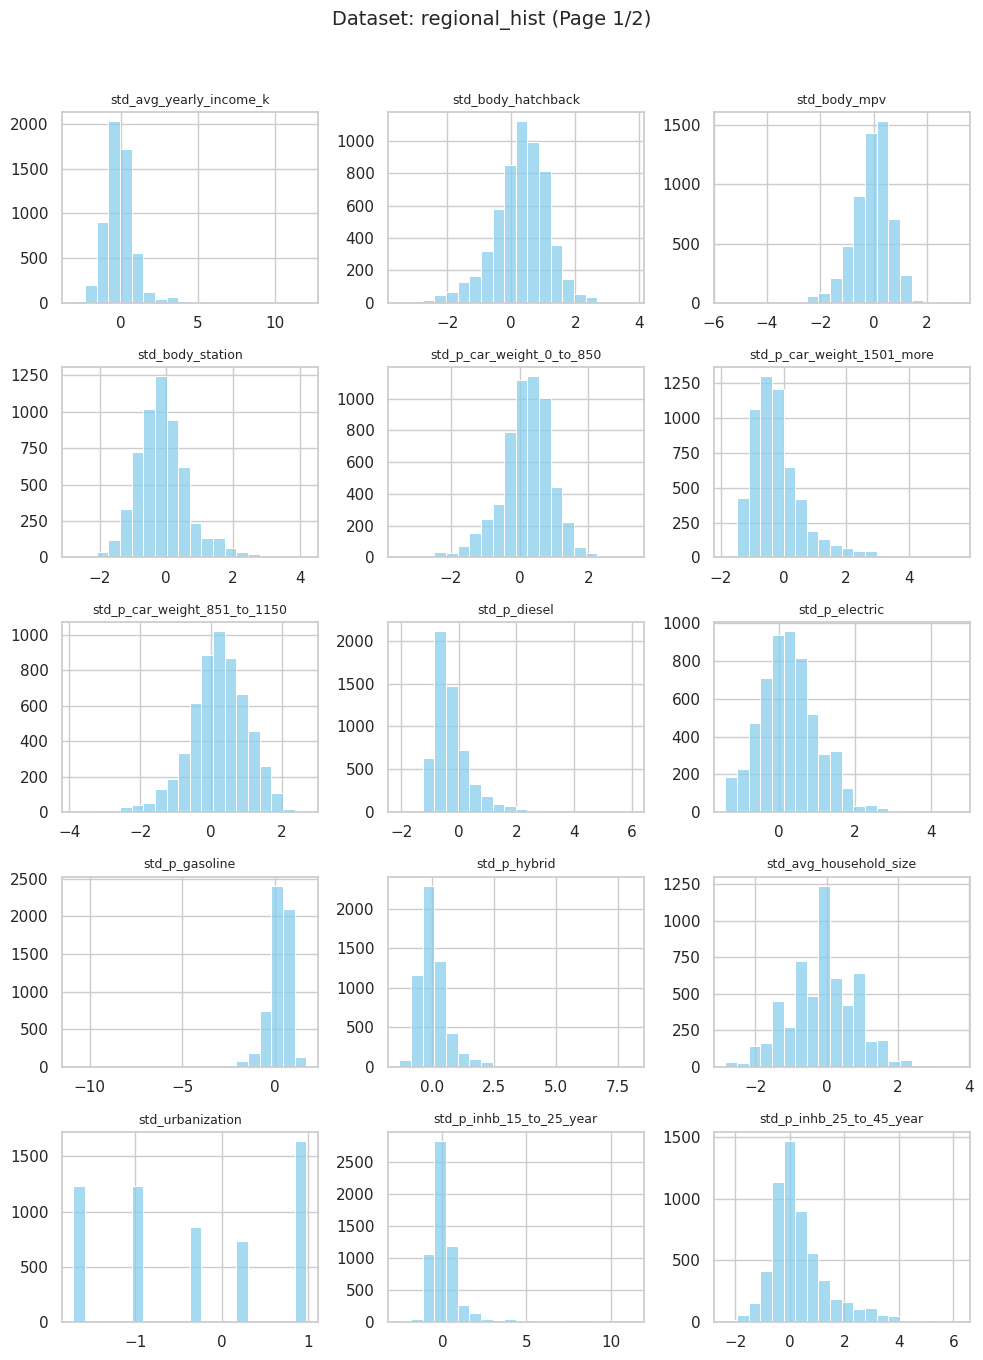

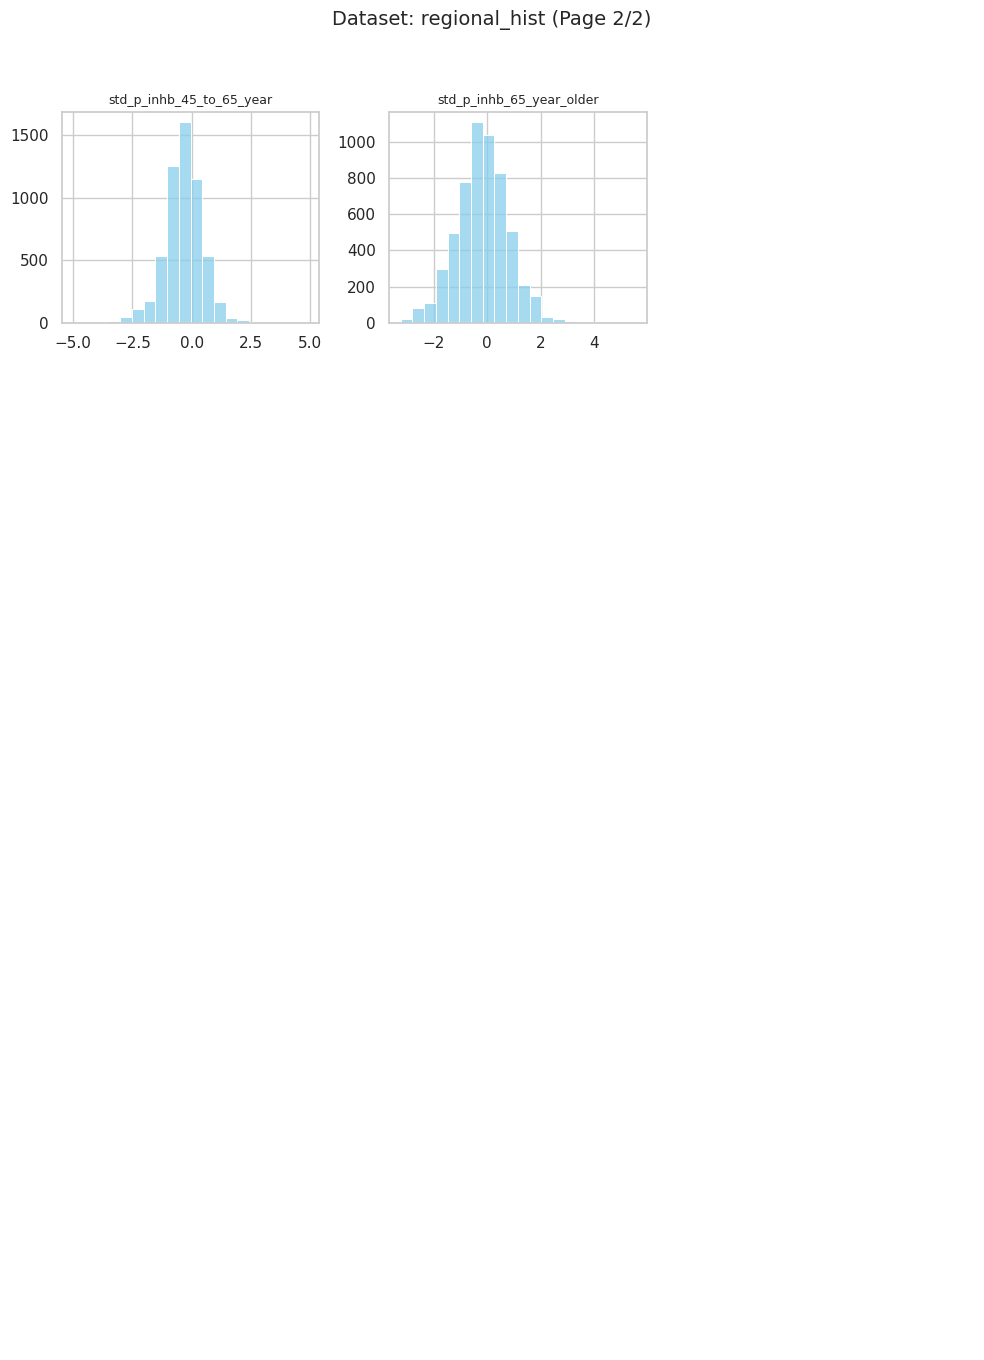

In [10]:
sns.set(style="whitegrid")
export_histograms(df, cols_mapping["df"], "regional_hist", output_dir)